In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [23]:
# For simplicity, let's use just two features: Annual Income and Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


print(wcss)

[400.0, 273.66888662642015, 157.70400815035947, 109.22822707921347, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.319122878338824, 32.49508119910091, 30.05932269404221]


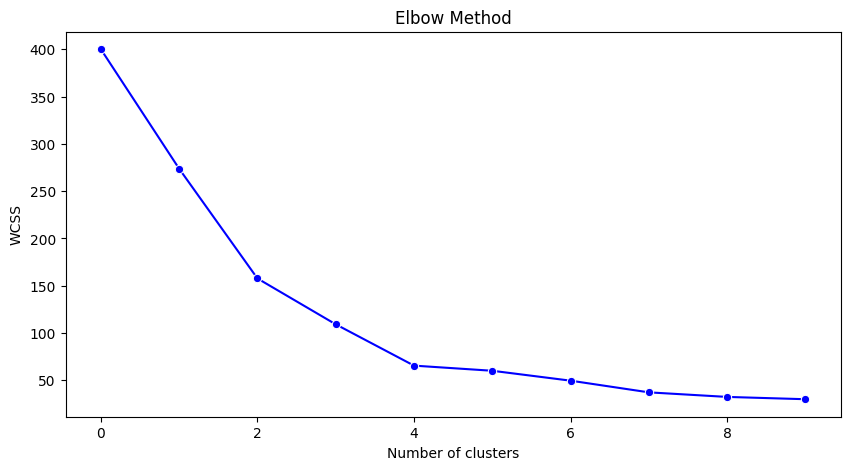

In [25]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10,5))
sns.lineplot(data=wcss, marker='o', color='blue') 
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


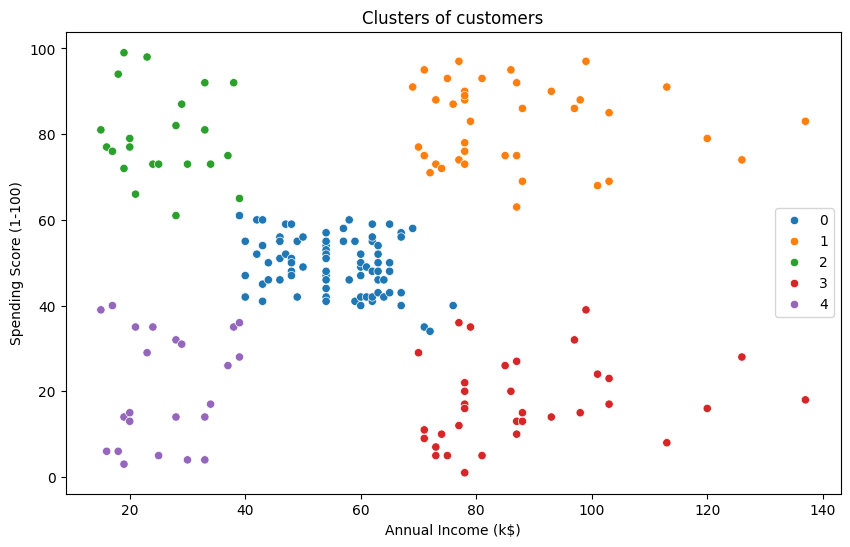

In [27]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=y_kmeans, palette='tab10')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='o', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [28]:
input_income = 80  # Example value for Annual Income (k$)
input_spending_score = 80  # Example value for Spending Score (1-100)

# Reshape the input for prediction
import numpy as np
input_data = np.array([[input_income, input_spending_score]])
input_data_scaled = scaler.transform(input_data)

# Predict the cluster
predicted_cluster = kmeans.predict(input_data_scaled)[0]
print("Input values:")
print("Annual Income (k$):", input_income)
print("Spending Score (1-100):", input_spending_score)
print("Predicted Cluster:", predicted_cluster)


Input values:
Annual Income (k$): 80
Spending Score (1-100): 80
Predicted Cluster: 1


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
sample=np.array([[15,42]])
scalesample = scaler.transform(sample)
predicted_cluster = kmeans.predict(scalesample)[0]
print("Predicted Cluster:", predicted_cluster)


Predicted Cluster: 4


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
sample=np.array([[10,80],[80,20]])
scalesample = scaler.transform(sample)
predicted_cluster = kmeans.predict(scalesample)
print("Predicted Cluster:", predicted_cluster)

Predicted Cluster: [2 3]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
